In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.datasets import fetch_california_housing

In [44]:
housing=fetch_california_housing()
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)
# add target column
dataset['target']=housing.target

In [45]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
X=dataset.drop('target',axis=1)

In [48]:
y=dataset['target']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
regression=LinearRegression()

In [52]:
regression.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=regression.predict(X_test)

In [54]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [55]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5305677824766752
R-squared: 0.5957702326061664


In [56]:
cv_scores=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [58]:
cv_mse=-cv_scores

In [59]:
print(f"Cross-Validation MSE: {cv_mse.mean()}")

Cross-Validation MSE: 0.5257104326777


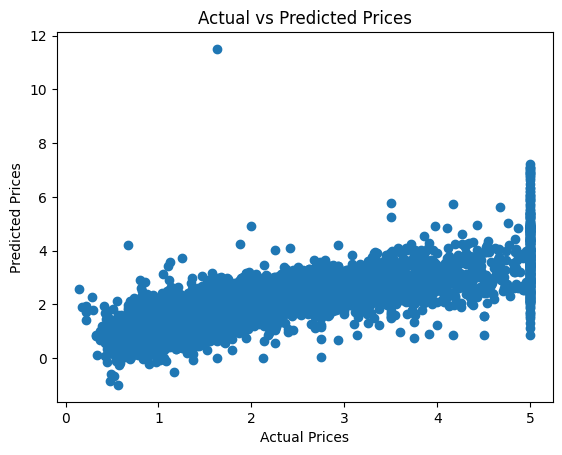

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

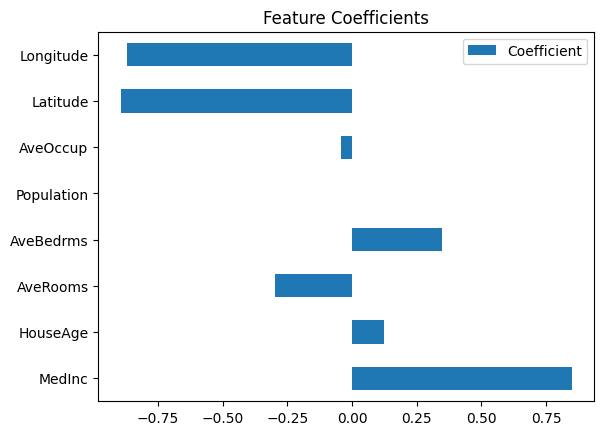

In [61]:
coef_df = pd.DataFrame(regression.coef_, index=X.columns, columns=['Coefficient'])
coef_df.plot(kind='barh')
plt.title('Feature Coefficients')
plt.show()

Residual Plot
A residual plot helps to analyze the distribution of residuals (difference between actual and predicted values) to check if there are any patterns or heteroscedasticity (unequal variance) in the errors.

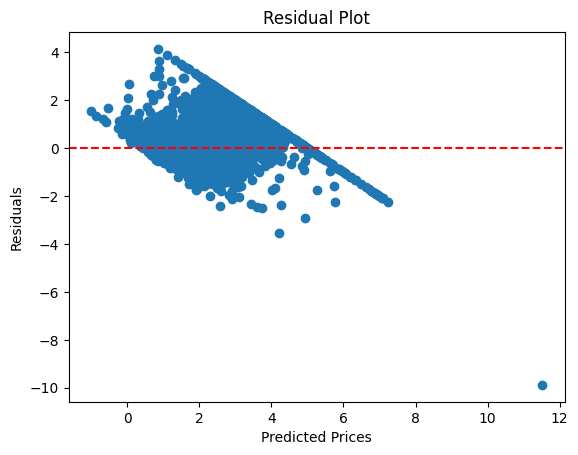

In [62]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [ ]:
# Visualize the distribution of residuals to check if they are normally distributed, which is an assumption of linear regression.

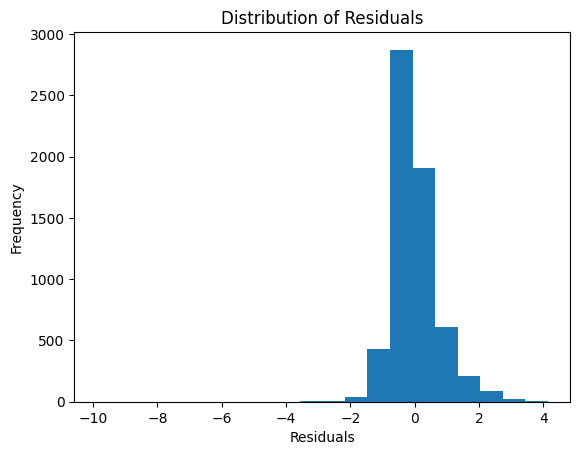

In [63]:
# Plot histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


Actual vs Predicted Prices (with Regression Line)
Plot the actual vs predicted prices with a regression line to visually assess how well the predictions match the actual values.

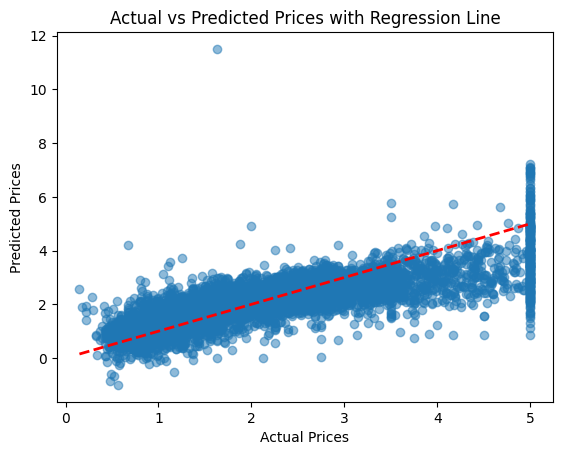

In [64]:
# Plot actual vs predicted prices with regression line
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Regression Line')
plt.show()
